<a href="https://colab.research.google.com/github/gitvanya34/SortifyScan/blob/main/Detection_and_Segmentation_Sortify_Scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#–ö–æ–Ω—Å—Ç–∞–Ω—Ç—ã

In [115]:
FLAG_COLAB = True
PATH_BEGIN_IMAGE = "/content/drive/MyDrive/images/render2.png"
PATH_WEIGHTS = '/content/drive/MyDrive/yolov8l.pt 2.0 /runs4 best 0.751 /detect/train4/weights/best.pt'


# –†–∞–∑–º–µ—Ä—ã –ª–µ–Ω—Ç—ã –∫–∞–ª–∏–±–æ—Ä–æ–≤–∞–Ω–Ω—ã–µ —Ä–µ–∞–ª—å–Ω—ã–µ –≤ –º–µ—Ç—Ä–∞—Ö
lenta_real_left = 3.44579
lenta_real_right = 3.19624
lenta_real_up = 0.803967
lenta_real_down = 0.800971
lenta_real_wight = 0.8007
lenta_real_camera_lenght = 1.10854
# –û—Ç–∫–∞–ª–∏–±—Ä–æ–≤–∞–Ω–Ω—ã–µ –≥—Ä–∞–Ω–∏—Ü—ã –ª–µ–Ω—Ç—ã –ø–∏–∫—Å–µ–ª–∏ –ª–µ–Ω—Ç—ã, –ª–µ–≥–∫–æ –∫–∞–ª–∏–±—Ä—É—é—Ç—Å—è —Å –∫–ª–∏–µ–Ω—Ç–∞
arr_lenta_left = np.array([[164,0],[190,640]])
arr_lenta_right = np.array([[640,509],[327,0]])
arr_lenta_up = np.array([[164,0],[327,0]])
arr_lenta_down = np.array([[640,509],[190,640]])

perspective_coef = calculate_perspective_coef()

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞

In [116]:
if FLAG_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')
  !pip install ultralytics
  !pip install shapely
  # !pip install pillow
  FLAG_COLAB = False
import json
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics.models.sam import Predictor as SAMPredictor
from pathlib import Path
import cv2
import numpy as np
from ultralytics import YOLO
from shapely.geometry import Polygon, LinearRing, LineString
import gc
import torch
import torchvision
from shapely.geometry import Polygon, LinearRing, LineString

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
def clean_memory_for_gpu():
  torch.cuda.empty_cache()
  gc.collect()

# –î–µ—Ç–µ–∫—Ü–∏—è

In [118]:
def detection(path_weights: str = PATH_WEIGHTS,\
              path_image: str = PATH_BEGIN_IMAGE,\
              conf: float = 0.75) -> list:
  """–ú–µ—Ç–æ–¥ –¥–µ—Ç–µ–∫—Ü–∏–∏ —É–ø–∞–∫–æ–≤–∫–∏
  Parameters
  ----------
  path_weights: str = PATH_WEIGHTS
  path_image: str = PATH_BEGIN_IMAGE
  conf: float = 0.75
  """
  model = YOLO(path_weights)
  result = model.predict(source=path_image,\
        save = True, \
        conf = conf,\
        )
  return result



# –°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è

In [119]:
# TODO: –¥–æ–¥–µ–ª–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≤—ã–Ω–µ—Å—Ç–∏ –º–æ–¥–µ–ª—å –≤ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É
def segmentation_bboxes(image, bboxes):
  """–ú–µ—Ç–æ–¥ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ —É–ø–∞–∫–æ–≤–∫–∏ –ø–æ bbox
  Parameters
  ----------
  # image - np.array image (result[0].orig_img)
  """
  overrides = dict(conf=0.99,  task='segment', mode='predict',  model="sam_b.pt")
  predictor = SAMPredictor(overrides=overrides)
  predictor.set_image(image)
  # bboxes = list(box.values())
  result = predictor(bboxes = bboxes)
  return result


def segmentation(image):
  """–ú–µ—Ç–æ–¥ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
  Parameters
  ----------
  # image - np.array image (result[0].orig_img)
  """
  overrides = dict(conf=0.99,  task='segment', mode='predict',  model="sam_b.pt", save_crop  = True )
  predictor = SAMPredictor(overrides=overrides)
  predictor.set_image(image)
  result = predictor()
  return result


# –í—ã–≤–æ–¥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

In [120]:
def show_image_after_ultralytics(result: list):
  """–ú–µ—Ç–æ–¥ –≤—ã–≤–æ–¥–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
  Parameters
  ----------
  result: list
  —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
  """
  image = Image.open(result[0].save_dir + '/' + \
                     result[0].path.split('/')[-1])
  plt.imshow(image)
  plt.show()

In [121]:
def show_image(img: list):
  """–ú–µ—Ç–æ–¥ –≤—ã–≤–æ–¥–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è np
  """
  plt.imshow(img)
  plt.show()

# –≠–∫—Å–ø–æ—Ç—Ä bbox

In [122]:
def result_to_json(result):
  """–≠–∫—Å–ø–æ—Ä—Ç –¥–∞–Ω–Ω—ã—Ö –∏–∑ result –≤ json
  Parameters
  ----------
  result: list
  —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
  ----------
  """
  for r in result:
    print(r.tojson())

  j = json.loads(json.dumps(r.tojson()))
  return j


def get_bbox_from_result(j):
  """–ü–æ–ª—É—á–∏—Ç—å –¥–∞–Ω–Ω—ã–µ bbox –∏–∑ json –≤ —Ñ–æ—Ä–º–∞—Ç–µ [x1,y1,x2,y2]"""
  box = json.loads(j)[0]['box']
  print(list(box.values()))
  return list(box.values())


# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Å–µ–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ–≤—Ç–æ—Ä–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –Ω–∞ –±–æ–ª–µ–µ –º–µ–ª–∫–∏–µ –æ–±—ä–µ–∫—Ç—ã

In [123]:
def preparing_for_detailed_segmentation(result, crop: bool = False, bgcolor:str = "white"):
  """–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –±–æ–∫–æ–≤—ã—Ö –≥—Ä–∞–Ω–µ–π(—É–º–µ–Ω—å—à–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏, —É–¥–∞–ª–µ–Ω–∏–µ –ª–∏—à–Ω–∏—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤)
  –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç–µ np
  –ü–∞—Ä–∞–º–µ—Ç—Ä:

  """
  for r in result:
      img = np.copy(r.orig_img)
      img_name = Path(r.path).stem

      # iterate each object contour
      for ci,c in enumerate(r):
          # Create contour mask
          contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)

          # OPTION-3: —á–µ—Ä–Ω—ã–π —Ñ–æ–Ω
          if(bgcolor == "black"):
            b_mask = np.zeros(img.shape[:2], np.uint8)
            cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)
            mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
            isolated = cv2.bitwise_and(mask3ch, img)

          # OPTION-2: –ø—Ä–æ–∑—Ä–∞—á–Ω—ã–π —Ñ–æ–Ω # –ë–µ–ª—ã–π —Ñ–æ–Ω —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ –∏–∑-–∑–∞ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤
          if(bgcolor == "white"):
            white_bg = np.ones_like(img) * 255
            cv2.drawContours(white_bg, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)
            isolated = cv2.bitwise_or(white_bg, img)

          # OPTION-3: –ø—Ä–æ–∑—Ä–∞—á–Ω—ã–π —Ñ–æ–Ω –Ω–∞ —Å—Ç–∞–¥–∏–∏ —Ä–∞—Å–ø–æ–∑–Ω–æ–≤–∞–Ω–∏—è —É–±–∏—Ä–∞–µ—Ç –∞–ª—å—Ñ–∞ –∫–∞–Ω–∞–ª –∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –æ—Å—Ç–∞–µ—Ç—Å—è –Ω–µ–∏–∑–º–µ–Ω–Ω—ã–º
          # isolated = np.dstack([img, b_mask])

          bbx1, bby1, bbx2, bby2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
          iso_crop = isolated[bby1:bby2, bbx1:bbx2]
          _ = cv2.imwrite(f'segcrop{ci}.png', isolated)
          print(f'segcrop{ci}.png —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ –Ω–∞ –¥–∏—Å–∫')

          if(crop):
            return iso_crop
          else:
            return isolated

#–°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –≥—Ä–∞–Ω–µ–π

In [124]:
def segmentation_of_the_side(result, crop: bool = False, bgcolor:str = "white"):
  img = preparing_for_detailed_segmentation(result, crop, bgcolor)
  show_image(img)
  result = segmentation(img)
  return result

# –†–∏—Å—É–µ–º –∫–æ–Ω—Ç—É—Ä—ã –≤ –º–∞—Ç–ø–ª–æ—Ç–ª–∏–±–µ

In [132]:
def draw_point_cloud_edges(xy: list, size: list = [640,640]):
  fig = plt.figure()
  ax = plt.axes()

  plt.xlim([0, size[0]])
  plt.ylim([-size[1], 10])#-640, 0  , 10–ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–µ –≤–∏–¥–Ω–æ –≤—Ä–µ–∑–Ω—é—é –≥—Ä–∞–Ω–∏—Ü—É

  x1, y1, x2, y2, x3, y3 = xy

  # —Ç–æ—á–∫–∏ –≥—Ä–∞–Ω–µ–π
  ax.scatter(x1, y1, 0.1)
  ax.scatter(x2, y2, 0.1)
  ax.scatter(x3, y3, 0.1)

  # # –∫–æ–Ω—Ç—É—Ä—ã –≥—Ä–∞–Ω–µ–π
  # plt.plot(x1, y1)
  # plt.plot(x2, y2)
  # plt.plot(x3, y3)

  # –≥—Ä–∞–Ω–∏—Ü—ã –ª–µ–Ω—Ç—ã
  plt.plot(arr_lenta_left[:,0] , -arr_lenta_left[:,1])
  plt.plot(arr_lenta_right[:,0] , -arr_lenta_right[:,1])
  plt.plot(arr_lenta_down[:,0] , -arr_lenta_down[:,1])
  plt.plot(arr_lenta_up[:,0] , -arr_lenta_up[:,1])

  plt.show()


# –†–∞—Å—á–µ—Ç –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∏–∑–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–π –ø—Ä–æ–µ–∫—Ü–∏–∏

In [126]:
def calculate_perspective_coef():
  def distance(xs, ys):
    return np.sqrt((xs[0] - xs[1]) ** 2 + (ys[0] - ys[1]) ** 2)

  coef_perspectiva = distance(arr_lenta_down[:,0],-arr_lenta_down[:,1]) / distance(arr_lenta_up[:,0] , -arr_lenta_up[:,1])
  return coef_perspectiva

In [127]:
def get_xy_edges(result, bbox):
  # for r in result:
  #   print(len(r.masks.xy[0]))
  #   print(len(r.masks.xy[1]))
  #   print(len(r.masks.xy[2]))
  #   print(len(r.masks.xy[3]))
  r = result[0]

  bbx1, bby1 = bbox[0], bbox[1]
# TODO: –ù—É–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –Ω—É–∂–Ω—ã–µ –∏–Ω–¥–µ–∫—Å—ã –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç –¥–ª—è –≥—Ä–∞–Ω–µ–π, –≤–æ–∑–º–æ–∂–Ω–æ –æ—à–∏–±–æ—á–Ω–æ–µ –≤—ã–¥–µ–ª–µ–Ω–∏–µ
  x1, y1 = bbx1 + np.array(r.masks.xy[-3])[:,0],-(np.array(r.masks.xy[-3])[:,1] + bby1)
  x2, y2 = bbx1 + np.array(r.masks.xy[-2])[:,0],-(np.array(r.masks.xy[-2])[:,1] + bby1)
  x3, y3 = bbx1 + np.array(r.masks.xy[-1])[:,0],-(np.array(r.masks.xy[-1])[:,1] + bby1)

  point_cloud = [x1,y1,x2,y2,x3,y3]

  print(len(x1), len(y1))
  print(len(x2), len(y2))
  print(len(x3), len(y3))

  return point_cloud

In [128]:
def approximate_point_cloud(xy: list, size: list = [640,640]):
  x1,y1,x2,y2,x3,y3 = point_cloud

  fig = plt.figure()
  ax = plt.axes()
  plt.xlim([0, size[0]])
  plt.ylim([-size[1], 10])#-640, 0  , 10–ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–µ –≤–∏–¥–Ω–æ –≤—Ä–µ–∑–Ω—é—é –≥—Ä–∞–Ω–∏—Ü—É

  points = np.c_[x1,y1]
  line_strings = simplify_polygon(points, epsilon = 5)
  x_line, y_line = [],[]
  for l in line_strings:
    x_line += l.xy[0]
    y_line += l.xy[1]
  plt.plot(x_line, y_line,  'o-')

  points = np.c_[x2,y2]
  line_strings = simplify_polygon(points, epsilon = 5)
  x_line, y_line = [],[]
  for l in line_strings:
    x_line += l.xy[0]
    y_line += l.xy[1]
  plt.plot(x_line, y_line,  'o-')

  points = np.c_[x3,y3]
  line_strings = simplify_polygon(points, epsilon = 5)
  x_line, y_line = [],[]
  for l in line_strings:
    x_line += l.xy[0]
    y_line += l.xy[1]
  plt.plot(x_line, y_line,  'o-')

  # –≥—Ä–∞–Ω–∏—Ü—ã –ª–µ–Ω—Ç—ã
  plt.plot(arr_lenta_left[:,0] , -arr_lenta_left[:,1])
  plt.plot(arr_lenta_right[:,0] , -arr_lenta_right[:,1])
  plt.plot(arr_lenta_down[:,0] , -arr_lenta_down[:,1])
  plt.plot(arr_lenta_up[:,0] , -arr_lenta_up[:,1])

  plt.show()


  # –û—Ç–∫—Ä—ã–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é Pillow
  image = Image.open(PATH_BEGIN_IMAGE)
  # –ù–∞–ª–æ–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
  plt.imshow(image)


  points = np.c_[x1,y1]
  line_strings = simplify_polygon(points, epsilon = 5)
  x_line, y_line = [],[]
  for l in line_strings:
    x_line += l.xy[0]
    y_line += l.xy[1]
  y_line[:] = [-i for i in y_line]
  print(y_line)
  plt.plot(x_line, y_line,  'o-', label='–º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–º –º–µ—Ç–æ–¥–æ–º')

  points = np.c_[x2,y2]
  line_strings = simplify_polygon(points, epsilon = 5)
  x_line, y_line = [],[]
  for l in line_strings:
    x_line += l.xy[0]
    y_line += l.xy[1]
  y_line[:] = [-i for i in y_line]
  plt.plot(x_line, y_line,  'o-', label='–º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–º –º–µ—Ç–æ–¥–æ–º')

  points = np.c_[x3,y3]
  line_strings = simplify_polygon(points, epsilon = 5)
  x_line, y_line = [],[]
  for l in line_strings:
    x_line += l.xy[0]
    y_line += l.xy[1]
  y_line[:] = [-i for i in y_line]
  plt.plot(x_line, y_line,  'o-', label='–º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–º –º–µ—Ç–æ–¥–æ–º')


# –ê–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è –æ–±–ª–∞–∫–∞ —Ç–æ—á–µ–∫

### –º–µ—Ç–æ–¥–æ–º –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫–∞ —Å –ø–æ–º–æ—â—å—é –ø—Ä—è–º—ã—Ö –æ—Ç—Ä–µ–∑–∫–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä, –º–µ—Ç–æ–¥–æ–º –†–∞–º–µ—Ä–∞-–î—É–≥–ª–∞—Å–∞-–ü–µ–∫–µ—Ä–∞ –¢–û–ü(–ú–æ–∂–Ω–æ –¥—Ä–æ–ø–∞—Ç—å –º–∞–ª–µ–Ω—å–∫–∏–µ —É—á–∞—Å—Ç–∫–∏ –∏ –¥–æ—Å—Ç–∞—Ä–∏–≤–∞—Ç—å –±–æ–ª—å—à–∏–µ –æ—Ç—Ä–µ–∑–∫–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Å–∏—Ç—É–∞—Ü–∏–∏)

- –î–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è –º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫–∞ –¥–æ —á–µ—Ç—ã—Ä–µ—Ö—É–≥–æ–ª—å–Ω–∏–∫–∞ —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º–∏ –ø–æ—Ç–µ—Ä—è–º–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –º–µ—Ç–æ–¥–æ–º –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫–∞ —Å –ø–æ–º–æ—â—å—é –ø—Ä—è–º—ã—Ö –æ—Ç—Ä–µ–∑–∫–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä, –º–µ—Ç–æ–¥–æ–º –†–∞–º–µ—Ä–∞-–î—É–≥–ª–∞—Å–∞-–ü–µ–∫–µ—Ä–∞ (Ramer-Douglas-Peucker). –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç —É–º–µ–Ω—å—à–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–µ—Ä—à–∏–Ω –º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫–∞, –æ—Å—Ç–∞–≤–ª—è—è —Ç–æ–ª—å–∫–æ —Å–∞–º—ã–µ –∑–Ω–∞—á–∏–º—ã–µ —Ç–æ—á–∫–∏.

In [129]:

 # –Ω–∞—Ö–æ–¥–∏–º —á–µ—Ç—ã—Ä–µ —Å–∞–º—ã—Ö –±–æ–ª—å—à–∏—Ö –æ—Ç—Ä–µ–∑–∫–∞ –∏ –∏—â–µ–º –≥–¥–µ –æ–Ω–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ —Å–æ–µ–¥–∏–Ω–µ–Ω—ã –º–µ–ª–æ—á—å—é, –∑–∞—Ç–µ–º –¥—Ä–æ–ø–∞–µ–º –º–µ–ª–æ—á—å –∏ –∏—â–µ–º –≥–¥–µ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è –±–æ–ª—å—à–∏–µ

def simplify_polygon(points, epsilon):
    """ –£–ø—Ä–æ—â–µ–Ω–∏–µ –º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫–∞ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –†–∞–º–µ—Ä–∞-–î—É–≥–ª–∞—Å–∞-–ü–µ–∫–µ—Ä–∞ —Å–≤–æ–¥–∏—Ç –∫ 4—Ç—ã—Ä–µ–º —Å—Ç–æ—Ä–æ–Ω–∞–º"""
    # –£–ø—Ä–æ—â–µ–Ω–∏–µ –ª–∏–Ω–∏–∏ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –†–∞–º–µ—Ä–∞-–î—É–≥–ª–∞—Å–∞-–ü–µ–∫–µ—Ä–∞
    ring = LinearRing(points).simplify(epsilon)

    # –í–µ—Ä—à–∏–Ω—ã —É–ø—Ä–æ—â–µ–Ω–Ω–æ–≥–æ –º–Ω–æ–≥–æ—É–≥–æ–ª—å–Ω–∏–∫–∞ -1 —Ç–∞–∫ –∫–∞–∫ –ø–æ—Å–ª–µ–¥–Ω—è—è –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è
    xy = np.c_[np.array(ring.coords)]

    line_strings = drop_small_line(xy)
    line_strings = prolongation_segments(line_strings)
    line_strings = cut_at_intersection(line_strings)

    return line_strings


def drop_small_line(xy):
    """ –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –Ω–∞–±–æ—Ä 4-—Ä–µ—Ö —Ä–µ–±–µ—Ä LineString (—Å–≤–µ–¥–µ–Ω–∏–µ –¥–æ —á–µ—Ç—ã—Ä–µ—Ö—É–≥–æ–ª—å–Ω–∏–∫–∞)"""
    #–≤—ã–Ω–µ—Å–µ–º –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π —Å–ø–∏—Å–æ–∫ –Ω–∞–±–æ—Ä LineString
    xy_line_lenght = []
    for i in range(len(xy) - 1):
      line = LineString([xy[i], xy[i + 1]])
      xy_line_lenght.append([line.length, line])

    #–Ω–∞–π–¥–µ–º 4 —Å–∞–º—ã—Ö –±–æ–ª—å—à–∏—Ö —Ä–µ–±—Ä–∞, –¥—Ä–æ–ø–Ω–µ–º –º–µ–ª–æ—á—å
    while len(xy_line_lenght) != 4:
      xy_line_lenght.remove(min(xy_line_lenght))

    #–ø–µ—Ä–µ—Å–æ–∑–¥–∞–¥–∏–º –º–∞—Å—Å–∏–≤ –±–µ–∑ –¥–ª–∏–Ω–Ω—ã —Ä–µ–±–µ—Ä
    xy_line_lenght = np.array(xy_line_lenght)
    xy_line_lenght = xy_line_lenght[:,1]

    return xy_line_lenght


def prolongation_segments(line_strings):
    """ –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –Ω–∞–±–æ—Ä —Ä–µ–±–µ—Ä –≤ —Ñ–æ—Ä–º–∞—Ç–µ LineString"""
    #–∏–Ω—Ç—Ä–µ–ø–æ–ª–∏—Ä—É–µ–º –æ—Ç—Ä–µ–∑–∫–∏ —Å –æ–±–æ–∏—Ö —Å—Ç–æ—Ä–æ–Ω —á—Ç–æ –±—ã –ø–æ—Ç–æ–º –æ–±—Ä–µ–∑–∞—Ç—å –≤ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è—Ö —É—Å–ª–æ–≤–Ω–æ –Ω–∞ —Å–≤–æ—é—ç–µ –¥–ª–∏–Ω–Ω—É
    for i in range(len(line_strings)):
      c = list(line_strings[i].coords)

      p1 = [c[0][0] * 2 - c[1][0], c[0][1] * 2 - c[1][1]]
      p2 = [c[1][0] * 2 - c[0][0], c[1][1] * 2 - c[0][1]]
      line_strings[i] = LineString([p1,p2])
      x_line, y_line = line_strings[i].xy
    return line_strings


def cut_at_intersection(line_strings):
    """ –û–±—Ä–µ–∑–∞–µ—Ç –ø—Ä—è–º—ã–µ –ø–æ —Ä–µ—Å–µ—á–µ–Ω–∏—è–º –¥–æ —á–µ—Ç—ã—Ä–µ—Ö—É–≥–æ–ª—å–Ω–∏–∫–∞"""
    l = []
    for i in range(len(line_strings)):
      if (i == len(line_strings) - 1):
        points = line_strings[i].intersection([line_strings[i - 1], line_strings[0]])
      else:
        points = line_strings[i].intersection([line_strings[i - 1], line_strings[i + 1]])
      l.append(LineString([points[0].coords[0], points[1].coords[0]]))

    return l

#–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ


image 1/1 /content/drive/MyDrive/images/render2.png: 640x640 1 package, 61.4ms
Speed: 1.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict24


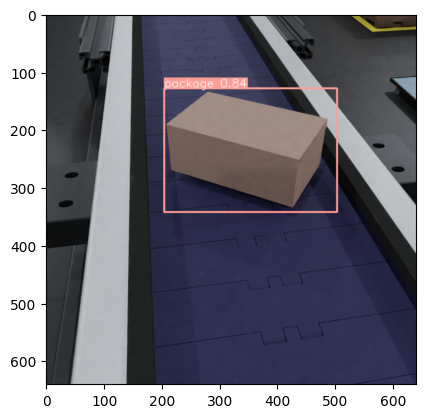

[
  {
    "name": "package",
    "class": 1,
    "confidence": 0.8446019887924194,
    "box": {
      "x1": 204.6577911376953,
      "y1": 128.74923706054688,
      "x2": 503.93438720703125,
      "y2": 342.52130126953125
    }
  }
]
[204.6577911376953, 128.74923706054688, 503.93438720703125, 342.52130126953125]
Ultralytics YOLOv8.1.24 üöÄ Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

0: 1024x1024 21.8ms
Speed: 0.1ms preprocess, 21.8ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict38


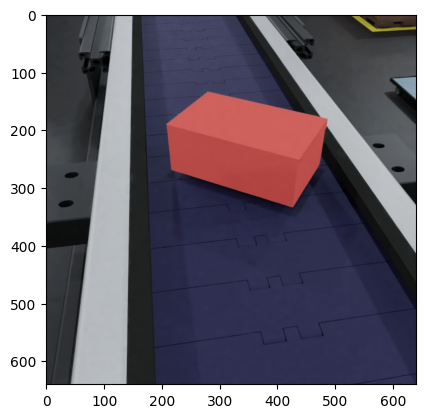

segcrop0.png —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ –Ω–∞ –¥–∏—Å–∫


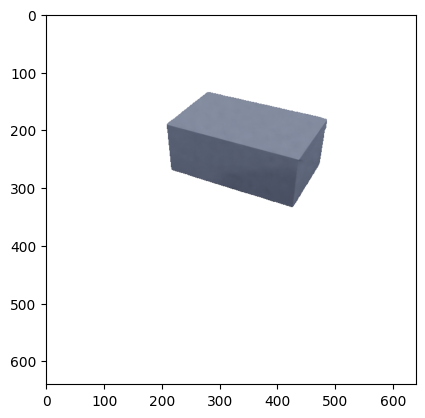

Ultralytics YOLOv8.1.24 üöÄ Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 4244.4ms
Speed: 0.1ms preprocess, 4244.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict39


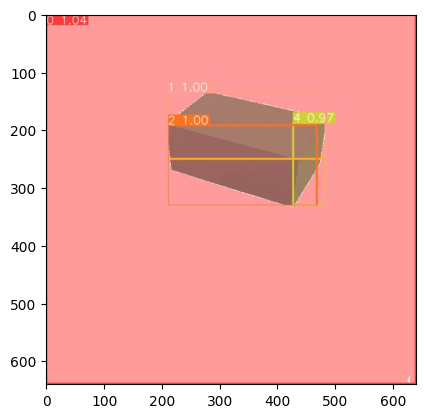

286 286
293 293
144 144


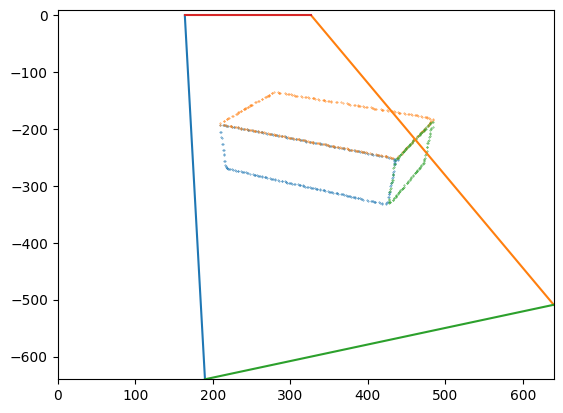

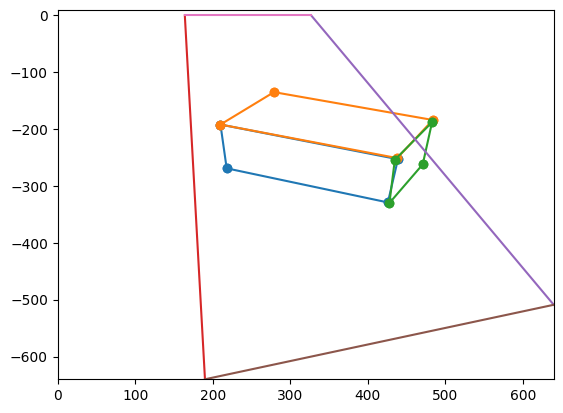

[192.0, 269.0, 269.0, 329.0, 329.0, 253.0, 253.0, 192.0]


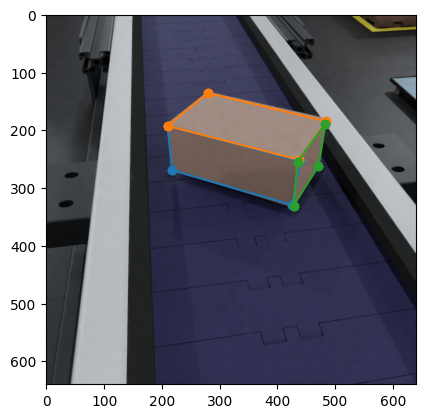

In [133]:
result = detection()
show_image_after_ultralytics(result)

bbox = get_bbox_from_result(result_to_json(result))
result = segmentation_bboxes(result[0].orig_img, bbox)
show_image_after_ultralytics(result)

result = segmentation_of_the_side(result, crop = False, bgcolor = 'white')
show_image_after_ultralytics(result)


point_cloud = get_xy_edges(result, bbox=[0,0])#TODO bbox –µ—Å–ª–∏ –∫—Ä–æ–ø –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –Ω–æ—Ä–º–∞—å–Ω—ã–π bbox —Å–¥–µ–ª–∞—Ç—å –ø—Ä–æ–≤–µ—Ä–∫—É
draw_point_cloud_edges(point_cloud)# TODO: –ø–µ—Ä–µ–¥–∞—Ç—å —Ä–∞–∑–º–µ—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∞—Ä–≥—É–º–µ–Ω—Ç–æ–º

approximate_point_cloud(point_cloud)


In [131]:
clean_memory_for_gpu()